In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Surface Water Data from the USGS

USGS Site No: 12422500 [link](https://waterdata.usgs.gov/nwis/inventory?site_no=12422500)

This site is reports the following data for the Spokane River in Spokane, WA:
- Discharge, cubic feet per second (Mean)
- Gage height, feet (Mean)


In [77]:
data = pd.read_csv('../data/raw_data/USGS-Surface-Water-Site-12422500.tsv',
                       low_memory=False,
                       delimiter='\t',
                       comment='#')

In [78]:
data = data.drop(0, axis=0)

In [79]:
data.head(5)

,agency_cd,site_no,datetime,149640_00060_00003,149640_00060_00003_cd,149641_00065_00003,149641_00065_00003_cd
1,USGS,12422500,1900-10-21,2410,A,NaN,NaN
2,USGS,12422500,1900-10-22,2750,A,NaN,NaN
3,USGS,12422500,1900-10-23,3100,A,NaN,NaN
4,USGS,12422500,1900-10-24,3280,A,NaN,NaN
5,USGS,12422500,1900-10-25,3460,A,NaN,NaN


In [81]:
df = data[['datetime','149640_00060_00003','149641_00065_00003']]

In [85]:
headers = {'datetime':'date', '149640_00060_00003':'discharge_cfs', '149641_00065_00003':'gage_ht'}
df = df.rename(columns=headers)

In [86]:
df.head(10)

,date,discharge_cfs,gage_ht
1,1900-10-21,2410,NaN
2,1900-10-22,2750,NaN
3,1900-10-23,3100,NaN
4,1900-10-24,3280,NaN
5,1900-10-25,3460,NaN
6,1900-10-26,3650,NaN
7,1900-10-27,3840,NaN
8,1900-10-28,3840,NaN
9,1900-10-29,3840,NaN
10,1900-10-30,4040,NaN


In [87]:
df['date'] = pd.to_datetime(df['date'])
df['discharge_cfs'] = df['discharge_cfs'].astype(float)
df['gage_ht'] = df['gage_ht'].astype(float)

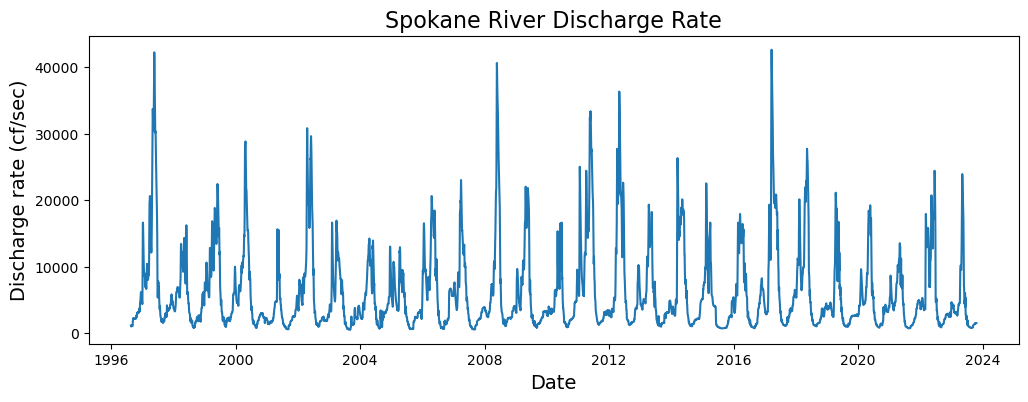

In [93]:
plt.figure(figsize=(12,4))
plt.title('Spokane River Discharge Rate', fontsize=16)

plt.plot(df.date.values[35000:], df.discharge_cfs.values[35000:])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Discharge rate (cf/sec)', fontsize=14)

plt.show()

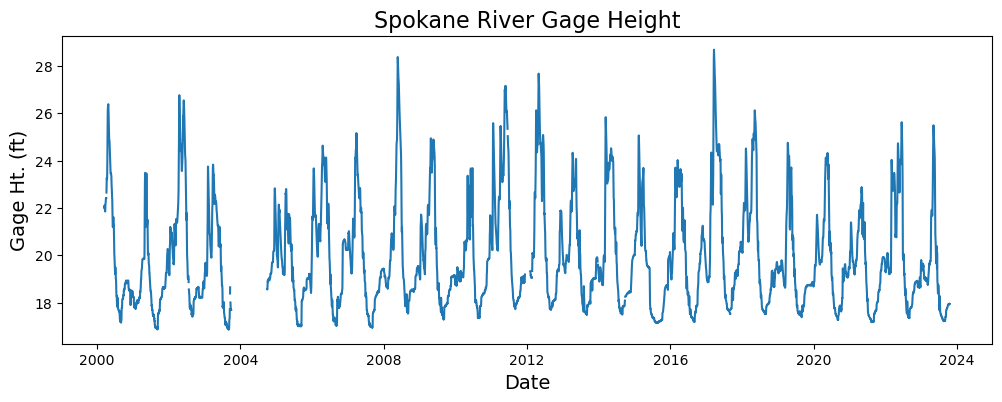

In [94]:
plt.figure(figsize=(12,4))
plt.title('Spokane River Gage Height', fontsize=16)

plt.plot(df.date.values[35000:], df.gage_ht.values[35000:])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gage Ht. (ft)', fontsize=14)

plt.show()